**Predicting Avocado Prices Using Machine Learning**  
Tasmita Tanjim Tanha (19723)

**Overview**  
Avocados are a widely consumed fruit with significant demand fluctuations across different regions and seasons. Understanding what drives avocado prices can help retailers, suppliers, and marketers make data-informed decisions. In this project, I used machine learning models to predict the average price of avocados using key features such as total volume sold, type, bags breakdown, region, and year.

**Problem**  
Avocado pricing is influenced by various factors including sales volume, regional demand, packaging size, and market type. Traditional forecasting methods may not capture complex nonlinear relationships between these variables and price. The goal is to build a regression model that can accurately predict average avocado prices for a given market scenario.

**Solution**  
I trained and evaluated multiple regression models including Decision Tree, Random Forest, and XGBoost, using preprocessing pipelines and hyperparameter tuning. The models were trained on historical avocado sales data and evaluated using MAE, RMSE, and R² metrics on unseen test data. The final comparison helped identify the best-performing algorithm for avocado price prediction.

---

**Dataset Selection**  
- The dataset was obtained from Kaggle (Avocado Prices dataset).  
- It contains over 18,000 rows and includes weekly avocado sales data from different regions across the U.S.  
- The target variable is AveragePrice — a continuous numeric value.  
- The problem type is regression.  
- The dataset contains no missing values and includes both numeric and categorical features.

**Key Features Used:**  
- TotalVolume: Total volume of avocados sold  
- SmallAvocados, LargeAvocados, XLAvocados: Volume by PLU size codes (4046, 4225, 4770)  
- TotalBags, SmallBags, LargeBags, XLargeBags: Bags sold in various sizes  
- type: Whether the avocado is conventional or organic  
- region: The geographic market where sales were recorded  
- year: The year of the sales record  

**Target Variable:**  
- AveragePrice: The average price per avocado for a given record  

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("avocado.csv")

In [41]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Checking the Shape of the Dataset** : A tuple like (18249, 13) indicating the dataset has 18,249 rows and 13 columns.

In [42]:
df.shape

(18249, 13)

**Listing All Column Names in the Dataset**: A summary view of all variable names such as dates, prices, volume-related data, packaging types, region, year, and avocado type.

In [43]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [44]:
df = df.rename(columns={
    "4046": "SmallAvocados",
    "4225": "LargeAvocados",
    "4770": "XLAvocados",
    "Total Volume": "TotalVolume",
    "Total Bags": "TotalBags",
    "Small Bags": "SmallBags",
    "Large Bags": "LargeBags",
    "XLarge Bags": "XLargeBags"
})

In [45]:
df.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'SmallAvocados', 'LargeAvocados',
       'XLAvocados', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags',
       'type', 'year', 'region'],
      dtype='object')

**Displaying Data Types and Non-Null Counts**
- The info() command generates a summary of the dataset, showing column names, data types, non-null entry counts, and memory usage.
- A structured overview listing all columns, their respective data types, how many non-null values exist per column, and how much memory the DataFrame occupies.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18249 non-null  object 
 1   AveragePrice   18249 non-null  float64
 2   TotalVolume    18249 non-null  float64
 3   SmallAvocados  18249 non-null  float64
 4   LargeAvocados  18249 non-null  float64
 5   XLAvocados     18249 non-null  float64
 6   TotalBags      18249 non-null  float64
 7   SmallBags      18249 non-null  float64
 8   LargeBags      18249 non-null  float64
 9   XLargeBags     18249 non-null  float64
 10  type           18249 non-null  object 
 11  year           18249 non-null  int64  
 12  region         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


**Generating Summary Statistics for Numerical Columns**
- The command calculates standard descriptive statistics for each numerical column, including:
  - Count of non-null values,Mean (average),Standard deviation,Minimum and maximum values,25th, 50th (median), and 75th percentiles


In [47]:
df.describe()

,AveragePrice,TotalVolume,SmallAvocados,LargeAvocados,XLAvocados,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Counting Missing Values in Each Column**:listing each column along with the number of missing values it contains. 

In [48]:
df.isnull().sum()

Date             0
AveragePrice     0
TotalVolume      0
SmallAvocados    0
LargeAvocados    0
XLAvocados       0
TotalBags        0
SmallBags        0
LargeBags        0
XLargeBags       0
type             0
year             0
region           0
dtype: int64

**Extracting Month and Day from Date Column(Date parsing)**
- This step first converts the Date column into a proper datetime format, then extracts the month and day from each date and stores them in new columns.
- Used for feature engineering—to enable time-based analysis such as identifying seasonal trends, monthly patterns, or day-specific behaviors in pricing or sales.
- How it Works:
  - The Date column is parsed into Python's datetime format.
  - From this formatted date, two new columns are created:
  - One for the month (numeric, 1-12)
  - One for the day of the month (1-31)
- Two new columns: Month and Day, each containing the respective numeric value extracted from the original Date field. These can now be used in groupings or visualizations.

In [49]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

C:\Users\tasmi\AppData\Local\Temp\ipykernel_17916\558394370.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


## Data visualization

**Displaying Updated Dataset Preview with New Time Features**
- This step displays the first few rows of the updated dataset after adding new columns for Month and Day.
- A preview of the dataset with the original columns and the newly added Month and Day columns visible. 

In [50]:
df.head()

,Date,AveragePrice,TotalVolume,SmallAvocados,LargeAvocados,XLAvocados,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


**Visualizing Market Share by Avocado Type**
- This block groups the dataset by avocado type (e.g., conventional and organic), calculates the total volume sold for each type, and displays it using a pie chart.
- How it Works:
  - The dataset is grouped by the type column.
  - The total Total Volume is calculated for each group.
  - The values are sorted in descending order for clarity.
  - A pie chart is then plotted to visually compare the market share between types.

Total Volume by Avocado Type:
type
conventional    1.508722e+10
organic         4.361817e+08
Name: TotalVolume, dtype: float64


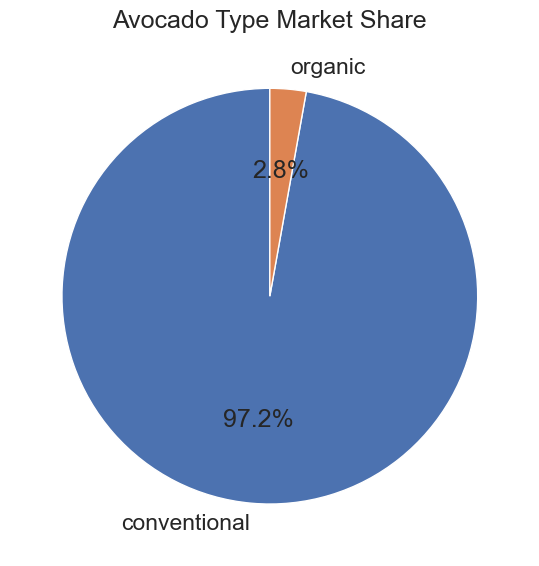

In [52]:
avocado_demand = df.groupby("type")["TotalVolume"].sum().sort_values(ascending=False)
print("Total Volume by Avocado Type:")
print(avocado_demand)

plt.figure(figsize=(6, 6))
avocado_demand.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Avocado Type Market Share')
plt.ylabel("")
plt.tight_layout()
plt.show()

Output:
- Conventional avocados dominate the market with 97.2% share, while organic avocados hold only 2.8%, indicating limited consumer demand or availability.

**Distribution Plot of Average Avocado Prices**
- This block creates a histogram of avocado prices and fits a normal distribution curve to visualize how prices are spread across all records.
- To analyze the frequency distribution of avocado prices and assess whether they follow a normal (bell-shaped) pattern. This can provide insight into pricing trends and variability.
- A blue histogram representing how avocado prices are distributed, overlaid with a smooth normal distribution curve. The plot helps assess skewness or concentration of prices around a central value.

C:\Users\tasmi\AppData\Local\Temp\ipykernel_17916\617565342.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df["AveragePrice"], kde=False, fit=norm, color='blue')


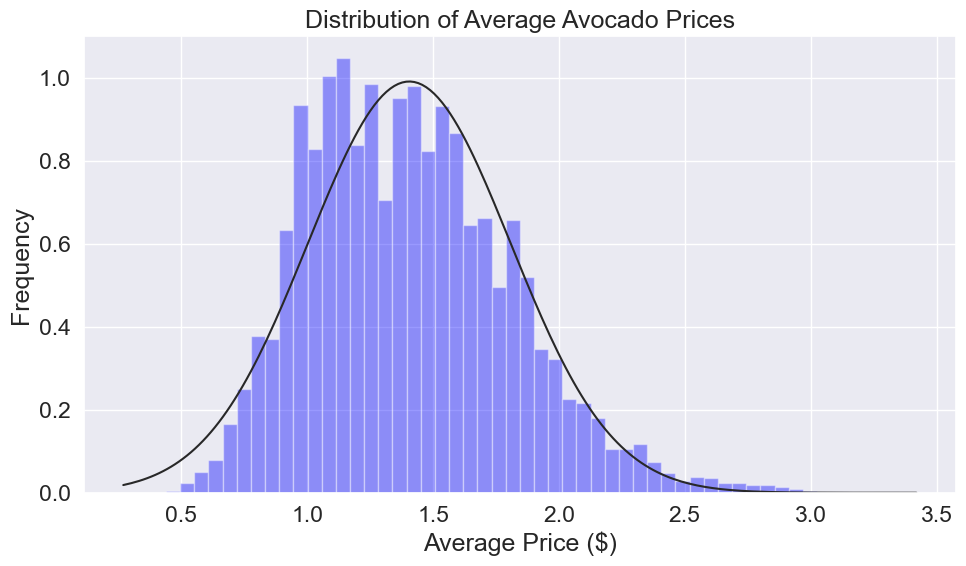

In [53]:
from scipy.stats import norm
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(a=df["AveragePrice"], kde=False, fit=norm, color='blue')

ax.set_title("Distribution of Average Avocado Prices")
ax.set_xlabel("Average Price ($)")
ax.set_ylabel("Frequency")
ax.grid(True)
plt.tight_layout()
plt.show()

Insights: Most avocado prices fall between $1.00 and $1.50, showing a slightly right-skewed distribution with fewer high-priced outliers.

**Monthly Price Trends by Avocado Type**
- This code generates a line plot to visualize how the average price of avocados varies across different months, separately for each avocado type (conventional and organic).
 
- How it Works:
  - The x-axis represents the month of the year (1 to 12).
  - The y-axis shows the average price of avocados.
  - The hue parameter distinguishes between avocado types using separate lines.
Output:
- A line chart with two curves, one for each avocado type. It shows how their average prices change month by month, allowing for direct visual comparison.

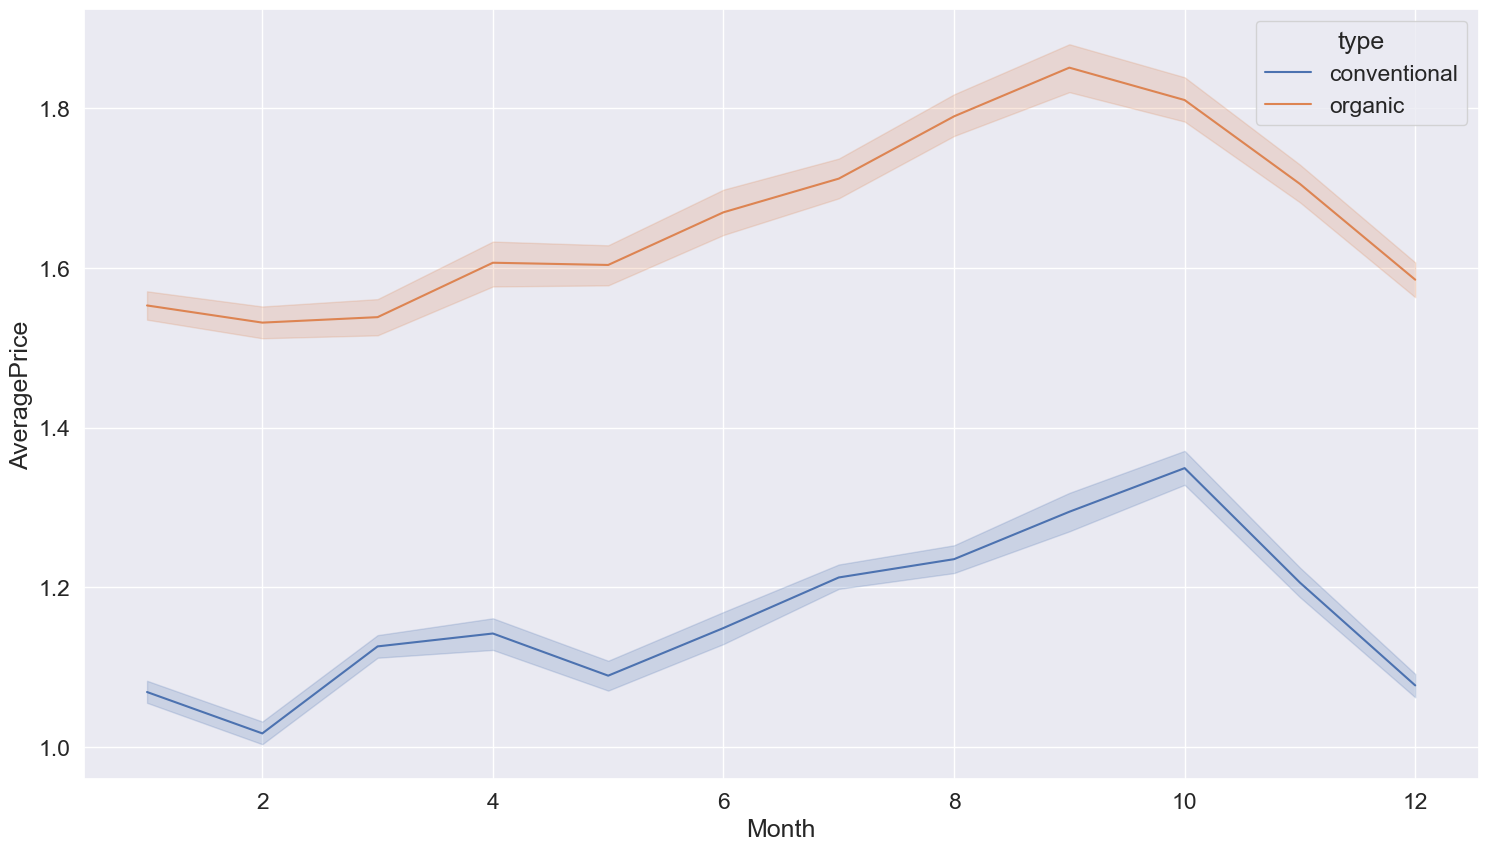

In [54]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

**Avocado Prices and Consumption – Top 5 Regions**

**Top 5 Regions with Highest Average Prices**- Shows the five regions where avocado prices are highest on average.
- Group data by region and calculate the average price.
- Sort in descending order and pick the top 5.

**Top 5 Regions with Highest Consumption**- Highlights the five regions that consume the most avocados based on total sales.
- Group data by region and calculate the total volume sold.
- Exclude "TotalUS" to focus on specific regions.
- Sort in descending order and pick the top 5.

**Summary**
- These two charts show which regions pay the most and which buy the most.
- Helps make better decisions in marketing, logistics, and regional planning.

C:\Users\tasmi\AppData\Local\Temp\ipykernel_17916\3774723966.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_regions.values, y=top_5_regions.index, palette="viridis", ax=axes[0])
C:\Users\tasmi\AppData\Local\Temp\ipykernel_17916\3774723966.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_consumption.values, y=top_5_consumption.index, palette="magma", ax=axes[1])


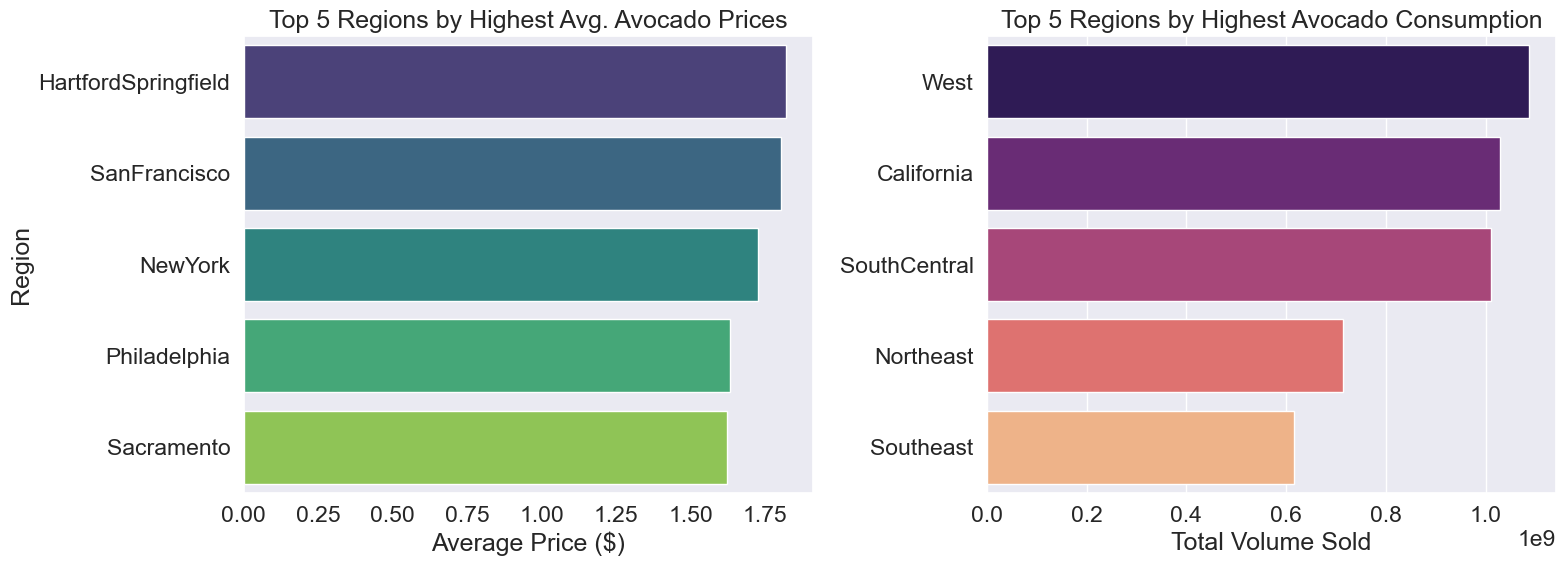

In [56]:
# Calculate average price by region
avg_price_by_region = df.groupby("region")["AveragePrice"].mean().sort_values(ascending=False)
top_5_regions = avg_price_by_region.head(5)

# Calculate total volume by region (excluding 'TotalUS')
total_volume_by_region = df.groupby("region")["TotalVolume"].sum().sort_values(ascending=False)
total_volume_by_region = total_volume_by_region.drop("TotalUS", errors='ignore')
top_5_consumption = total_volume_by_region.head(5)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot for average price
sns.barplot(x=top_5_regions.values, y=top_5_regions.index, palette="viridis", ax=axes[0])
axes[0].set_title("Top 5 Regions by Highest Avg. Avocado Prices")
axes[0].set_xlabel("Average Price ($)")
axes[0].set_ylabel("Region")
axes[0].grid(axis='x')

# Barplot for total volume
sns.barplot(x=top_5_consumption.values, y=top_5_consumption.index, palette="magma", ax=axes[1])
axes[1].set_title("Top 5 Regions by Highest Avocado Consumption")
axes[1].set_xlabel("Total Volume Sold")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


- HartfordSpringfield, San Francisco, and New York have the highest average avocado prices, suggesting possible supply constraints or higher cost of living.
- Meanwhile, West and California lead in total avocado consumption, indicating strong demand in those regions regardless of price.

**Yearly Comparison of Average Avocado Prices by Region**
- shows a grouped bar chart showing how the average price of avocados has changed across different regions over multiple years.
- The Date column is converted to datetime, and the year is extracted.
- The data is grouped by both region and Year, and the mean of AveragePrice is calculated.
- A bar chart is created where each region has multiple bars (one per year), with different colors representing different years.

Output(Yearly price trends):
- A multi-colored bar chart where each group of bars represents a region and each bar within a group represents the average price in a specific year. 

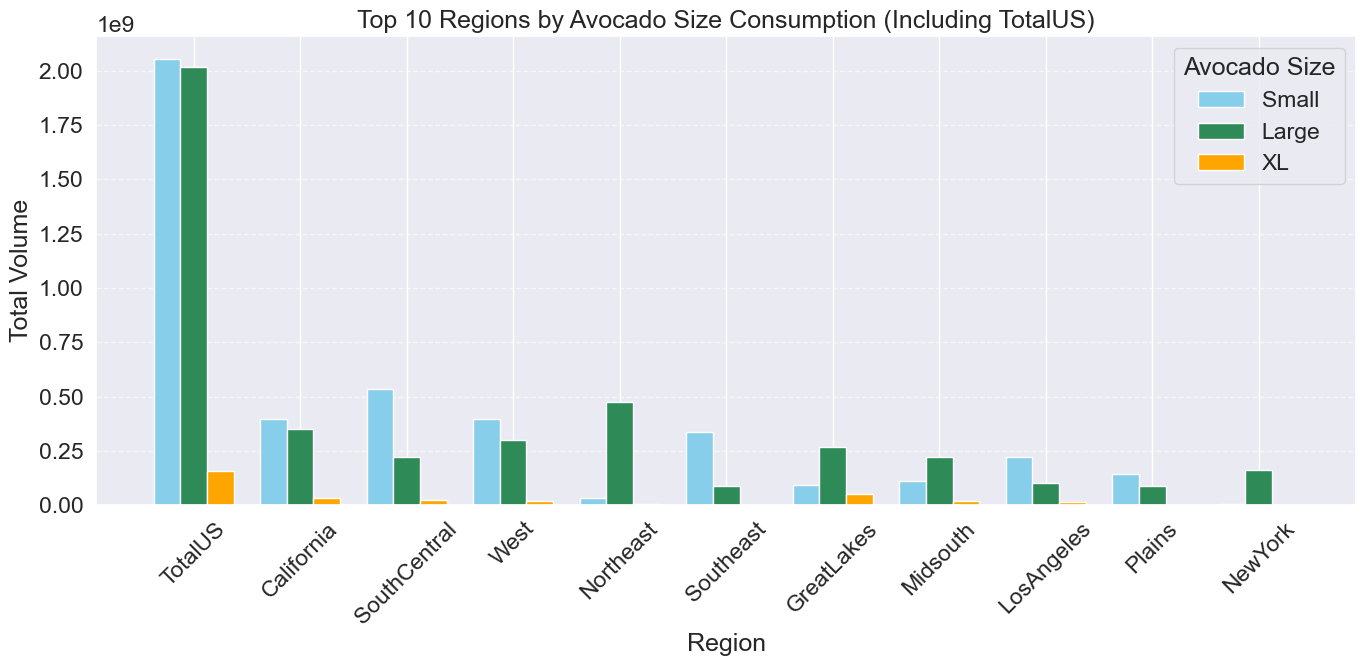

In [ ]:
# Group total volume by region for each avocado size
size_totals = df.groupby("region")[["SmallAvocados", "LargeAvocados", "XLAvocados"]].sum()

# Compute total volume across all sizes
size_totals["Total Volume"] = size_totals.sum(axis=1)

# Select top 10 regions by total volume (including 'TotalUS' if present)
top10_regions = size_totals.sort_values("Total Volume", ascending=False).head(11).drop(columns="Total Volume").reset_index()

x = np.arange(len(top10_regions["region"]))
width = 0.25

# Plot grouped bar chart
plt.figure(figsize=(14, 7))
plt.bar(x - width, top10_regions["SmallAvocados"], width, label='Small', color='skyblue')
plt.bar(x, top10_regions["LargeAvocados"], width, label='Large', color='seagreen')
plt.bar(x + width, top10_regions["XLAvocados"], width, label='XL', color='orange')

plt.title("Top 10 Regions by Avocado Size Consumption (Including TotalUS)")
plt.xlabel("Region")
plt.ylabel("Total Volume")
plt.xticks(x, top10_regions["region"], rotation=45)
plt.legend(title="Avocado Size")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

Small and large avocados are consumed the most across all regions, with TotalUS and California leading, while XL avocados have minimal demand nationwide.

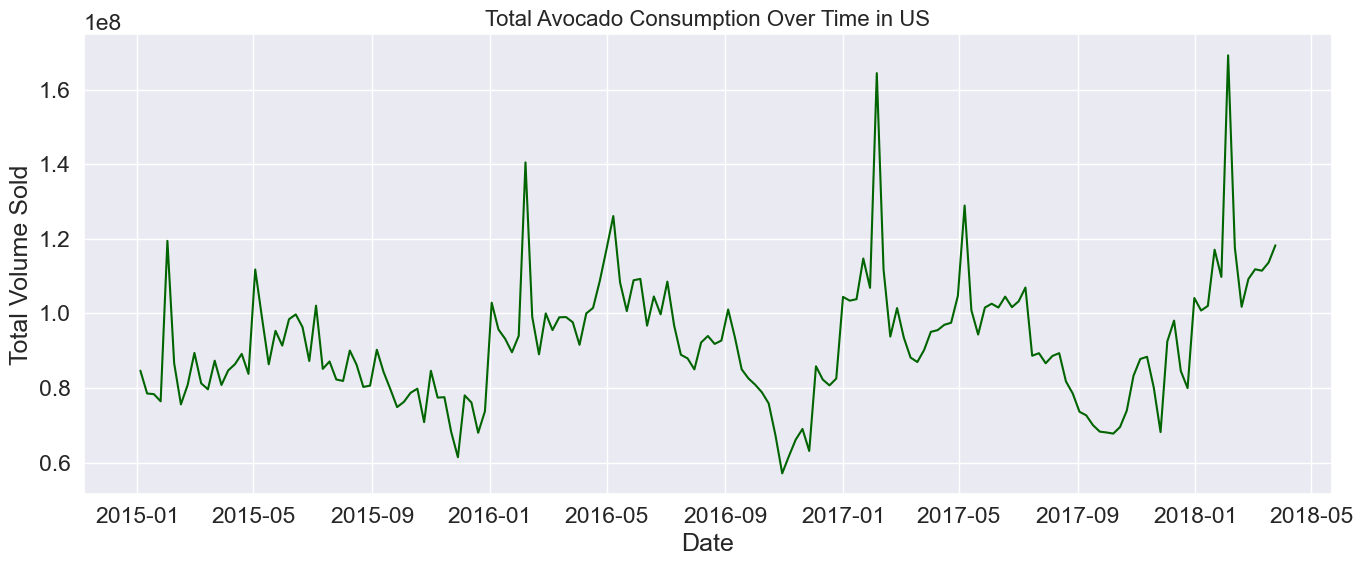

In [65]:
# Ensure Date column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Group by Date and sum Total Volume to get daily total consumption
daily_volume = df.groupby("Date")["TotalVolume"].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_volume, x="Date", y="TotalVolume", color="darkgreen")
plt.title("Total Avocado Consumption Over Time in US", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Volume Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

Avocado consumption in the U.S. shows seasonal spikes, especially early each year, with an overall increasing trend from 2015 to 2018.

**Correlation Analysis Between Average Price and Other Features**
Explanation:
- This block computes and visualizes the correlation between numerical features in the dataset, with a special focus on how strongly each one relates to the average avocado price.

Purpose:
- To identify which features have the strongest linear relationships with avocado price, helping in feature selection for modeling or understanding potential price drivers.

How it Works:
- The Date column is converted to datetime, and both Year and Month are extracted.
- A correlation matrix is calculated using only numeric columns.
- A heatmap is plotted to visually represent correlation values between pairs of features.
- Correlations with AveragePrice are sorted (by absolute value) and printed to highlight the strongest direct or inverse relationships.



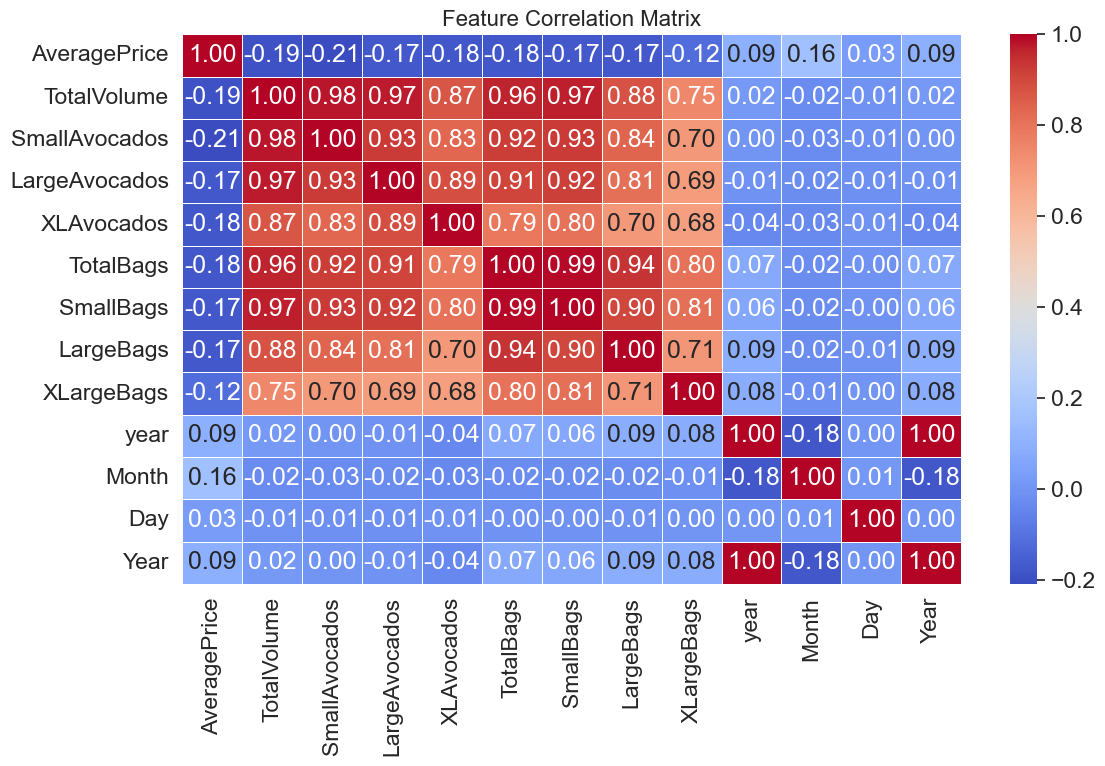

Top correlations with AveragePrice:
 AveragePrice     1.000000
SmallAvocados   -0.208317
TotalVolume     -0.192752
XLAvocados      -0.179446
TotalBags       -0.177088
SmallBags       -0.174730
LargeBags       -0.172940
LargeAvocados   -0.172928
Month            0.162409
XLargeBags      -0.117592
year             0.093197
Year             0.093197
Day              0.027386
Name: AveragePrice, dtype: float64


In [66]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()
target_corr = correlation_matrix["AveragePrice"].sort_values(key=abs, ascending=False)
print("Top correlations with AveragePrice:\n", target_corr)

Average price has a negative correlation with total volume and all avocado sizes, indicating that higher supply tends to lower prices, while bag sizes and avocado sizes are strongly correlated with each other.

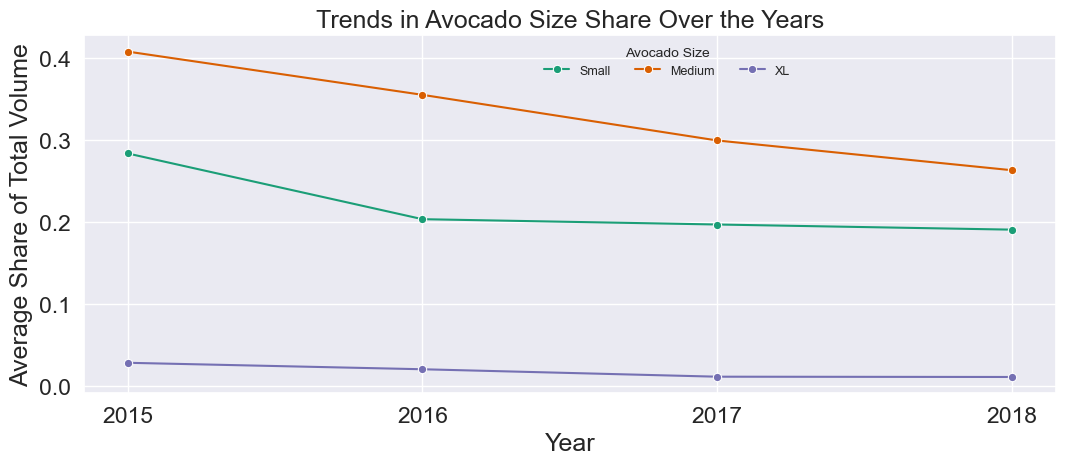

In [69]:
from matplotlib.ticker import MaxNLocator

# Convert date and extract year
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

# Compute avocado size share
df["SmallAvocadoShare"] = df["SmallAvocados"] / df["TotalVolume"]
df["MediumAvocadoShare"] = df["LargeAvocados"] / df["TotalVolume"]
df["LargeAvocadoShare"] = df["XLAvocados"] / df["TotalVolume"]

# Group and reshape
size_share_yearly = df.groupby("Year")[["SmallAvocadoShare", "MediumAvocadoShare", "LargeAvocadoShare"]].mean().reset_index()
size_share_melted = pd.melt(size_share_yearly,
    id_vars="Year",
    var_name="Avocado Size",
    value_name="Average Share")

# Rename for clarity in legend
size_share_melted["Avocado Size"] = size_share_melted["Avocado Size"].replace({
    "SmallAvocadoShare": "Small",
    "MediumAvocadoShare": "Medium",
    "LargeAvocadoShare": "XL"
})

# Plot
plt.figure(figsize=(11, 5))
ax = sns.lineplot(data=size_share_melted, x="Year", y="Average Share", hue="Avocado Size", marker="o", palette="Dark2")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Trends in Avocado Size Share Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Share of Total Volume")
plt.grid(True)
plt.legend(title="Avocado Size",
    loc="upper center",
    bbox_to_anchor=(0.6, 1.0),
    ncol=3,
    fontsize=9,
    title_fontsize=10,
    frameon=False)
plt.tight_layout()
plt.show()

The market share of all avocado sizes declined from 2015 to 2018, with medium-sized avocados consistently leading but showing the sharpest drop in consumption share over the years.

## Machine Learning

### Question?? Which machine learning model can most accurately predict avocado prices by capturing the influence of seasonal patterns, region, and sales volume?

In [ ]:
X = df.drop(columns=["AveragePrice", "Date"])
y = df["AveragePrice"]     #target value
X.columns

Index(['TotalVolume', 'SmallAvocados', 'LargeAvocados', 'XLAvocados',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region', 'Month', 'Day', 'Year', 'SmallAvocadoShare',
       'MediumAvocadoShare', 'LargeAvocadoShare'],
      dtype='object')

Numeric and categorical features in the dataset

In [ ]:
numeric_features = [
    "TotalVolume", "SmallAvocados", "LargeAvocados", "XLAvocados",
    "TotalBags", "SmallBags", "LargeBags", "XLargeBags", "year"
]
categorical_features = ["type", "region"]

print("Numeric Features:", ", ".join(numeric_features))
print("Categorical Features:", ", ".join(categorical_features))

Numeric Features: TotalVolume, SmallAvocados, LargeAvocados, XLAvocados, TotalBags, SmallBags, LargeBags, XLargeBags, year
Categorical Features: type, region


In [97]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

**Scaling Numeric Features**

In [ ]:
print("Before scaling (Numeric Features):")
display(X[numeric_features].describe().T[["mean", "std", "min", "max"]])


Before scaling (Numeric Features):


,mean,std,min,max
TotalVolume,850644.013009,3.453545e+06,84.56,62505646.52
SmallAvocados,293008.424531,1.264989e+06,0.00,22743616.17
LargeAvocados,295154.568356,1.204120e+06,0.00,20470572.61
XLAvocados,22839.735993,1.074641e+05,0.00,2546439.11
TotalBags,239639.202060,9.862424e+05,0.00,19373134.37
SmallBags,182194.686696,7.461785e+05,0.00,13384586.80
LargeBags,54338.088145,2.439660e+05,0.00,5719096.61
XLargeBags,3106.426507,1.769289e+04,0.00,551693.65
year,2016.147899,9.399385e-01,2015.00,2018.00


In [ ]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(X[numeric_features])
scaled_df = pd.DataFrame(scaled_numeric, columns=numeric_features)

print("After scaling(Numeric Features):")
display(scaled_df.describe().T[["mean", "std", "min", "max"]])

After scaling(Numeric Features):


,mean,std,min,max
TotalVolume,-2.491903e-17,1.000027,-0.246293,17.853158
SmallAvocados,-6.229757e-18,1.000027,-0.231636,17.748155
LargeAvocados,-2.180415e-17,1.000027,-0.245127,16.755775
XLAvocados,5.295294e-17,1.000027,-0.212540,23.483836
TotalBags,3.737854e-17,1.000027,-0.242989,19.400930
SmallBags,-9.344636e-18,1.000027,-0.244177,17.693827
LargeBags,-1.868927e-17,1.000027,-0.222734,23.220099
XLargeBags,2.803391e-17,1.000027,-0.175580,31.006925
year,-1.021182e-13,1.000027,-1.221282,1.970504


**One-hot encoder**

In [78]:
print("Before encoding (categorical features):")
for col in categorical_features:
    print(f"{col}: {X[col].nunique()} unique values")

Before encoding (categorical features):
type: 2 unique values
region: 54 unique values


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_cat = encoder.fit_transform(X[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))

print("\nAfter encoding (categorical features):")
print(f"Total encoded columns: {encoded_cat_df.shape[1]}")
print("Sample encoded column names:", list(encoded_cat_df.columns[:5]))


After encoding (categorical features):
Total encoded columns: 56
Sample encoded column names: ['type_conventional', 'type_organic', 'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington']
0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object


**Using ColumnTransformer**

In [96]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

# Combining into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [ ]:
# Prepare baseline models
baseline_models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, verbosity=0, random_state=42)
}

# Re-split train/test data to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store baseline results
baseline_results = []

# Evaluate each model without CV
for name, model in baseline_models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    baseline_results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "RMSE": round(rmse, 4),
        "R² Score": round(r2, 4)
    })

# Display baseline comparison
baseline_df = pd.DataFrame(baseline_results).sort_values(by="RMSE")
baseline_df.reset_index(drop=True, inplace=True)
baseline_df


,Model,MAE,RMSE,R² Score
0,Random Forest,0.1077,0.1533,0.8537
1,XGBoost,0.1268,0.1726,0.8145
2,Decision Tree,0.1421,0.2182,0.7036
3,Ridge,0.2034,0.2701,0.5459
4,Lasso,0.3225,0.4009,-0.0002


- Random Forest and XGBoost performed the best, with Random Forest slightly more accurate in predicting avocado prices.
- Lasso gave the poorest results, with high errors and almost no predictive power.

**Hyperparameter tuning for Decision Tree Regressor**

In [122]:
dt_param_grid = {
    "regressor__max_depth": [3, 5, 10],
    "regressor__min_samples_split": [2, 5, 10]
}

# Define pipeline
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

# Grid search with 5-fold cross-validation
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalVolume',
                                                                          'SmallAvocados',
                                                                          'LargeAvocados',
                                                                          'XLAvocados',
                                                                          'TotalBags',
                                                                          'SmallBags',
                                                                          'LargeBags',
                                                                          'XLargeBags',
                                                                          'year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['type',
                                                                          'region'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [3, 5, 10],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Now, we have a cross-validated, hyperparameter-tuned Decision Tree.

**Hyperparameter tuning for Random Forest Regressor**

In [123]:
rf_param_grid = {
    "regressor__n_estimators": [50, 100],
    "regressor__max_depth": [5, 10],
    "regressor__min_samples_split": [2, 5]
}

# Define pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Grid search with 5-fold cross-validation
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalVolume',
                                                                          'SmallAvocados',
                                                                          'LargeAvocados',
                                                                          'XLAvocados',
                                                                          'TotalBags',
                                                                          'SmallBags',
                                                                          'LargeBags',
                                                                          'XLargeBags',
                                                                          'year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['type',
                                                                          'region'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [5, 10],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

**Hyperparameter tuning for XGBoost Regressor**

In [124]:
xgb_param_grid = {
    "regressor__n_estimators": [50, 100],
    "regressor__max_depth": [3, 5],
    "regressor__learning_rate": [0.05, 0.1]
}

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42, verbosity=0))
])

xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TotalVolume',
                                                                          'SmallAvocados',
                                                                          'LargeAvocados',
                                                                          'XLAvocados',
                                                                          'TotalBags',
                                                                          'SmallBags',
                                                                          'LargeBags',
                                                                          'XLargeBags',
                                                                          'year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['type',
                                                                          're...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.05, 0.1],
                         'regressor__max_depth': [3, 5],
                         'regressor__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

**Extracting the best hyperparameters(.best_params_.)**

In [109]:
dt_best_rmse = round(np.sqrt(-dt_grid_search.best_score_), 4)
dt_best_params = dt_grid_search.best_params_

rf_best_rmse = round(np.sqrt(-rf_grid_search.best_score_), 4)
rf_best_params = rf_grid_search.best_params_

xgb_best_rmse = round(np.sqrt(-xgb_grid_search.best_score_), 4)
xgb_best_params = xgb_grid_search.best_params_

In [112]:
print("Model Evaluation Summary (After Hyperparameter Tuning)")
print("Decision Tree")
print("- Best Parameters:", dt_best_params)
print("- Best Cross-Validated RMSE:", dt_best_rmse,"\n")

print("Random Forest")
rf_best_params = rf_grid_search.best_params_
print("- Best Parameters:", rf_best_params)
print("- Best Cross-Validated RMSE:", rf_best_rmse,"\n")

print("XGBoost")
print("- Best Parameters:", xgb_best_params)
print("- Best Cross-Validated RMSE:", xgb_best_rmse,"\n")


Model Evaluation Summary (After Hyperparameter Tuning)
Decision Tree
- Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2}
- Best Cross-Validated RMSE: 0.2994 

Random Forest
- Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
- Best Cross-Validated RMSE: 0.281 

XGBoost
- Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}
- Best Cross-Validated RMSE: 0.2579 



**Final Interpretation:**

- **Before tuning**, Random Forest had the edge (**RMSE: 0.1533**), likely because it performs great out-of-the-box.
- **After tuning**, XGBoost overtook Random Forest by improving its performance through parameter tuning.

So currently, our **best overall model is XGBoost after tuning**, with a **cross-validated RMSE of 0.2579**, making it the most reliable performer for this regression task.


**Final model training (on real unseen test data)**

In [119]:
final_dt_pipeline = dt_grid_search.best_estimator_
final_rf_pipeline = rf_grid_search.best_estimator_
final_xgb_pipeline = xgb_grid_search.best_estimator_

# Fit on training data
final_dt_pipeline.fit(X_train, y_train)
final_rf_pipeline.fit(X_train, y_train)
final_xgb_pipeline.fit(X_train, y_train)

y_pred_dt = final_dt_pipeline.predict(X_test)
y_pred_rf = final_rf_pipeline.predict(X_test)
y_pred_xgb = final_xgb_pipeline.predict(X_test)

In [127]:
def evaluate_model(name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 4)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)
    r2 = round(r2_score(y_true, y_pred), 4)
    return [mae, rmse, r2]

# Collect results
results = {
    "Decision Tree": evaluate_model("Decision Tree", y_test, y_pred_dt),
    "Random Forest": evaluate_model("Random Forest", y_test, y_pred_rf),
    "XGBoost": evaluate_model("XGBoost", y_test, y_pred_xgb)
}

# Create and display results table
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R² Score"]).T
results_df.sort_values("RMSE", inplace=True)
print("Final Model Performance Summary:")
display(results_df)

Final Model Performance Summary:


,MAE,RMSE,R² Score
Random Forest,0.1458,0.1964,0.7598
XGBoost,0.1465,0.1987,0.7543
Decision Tree,0.2064,0.2682,0.5521


- **Random Forest** achieved the lowest RMSE and highest R² on the test data, indicating the best overall performance.
- **XGBoost** followed closely behind, with strong generalization and consistent predictions.
- **Decision Tree** showed signs of underfitting, with clear prediction banding and the lowest R².


**Plot Predicted vs. Actual Values**

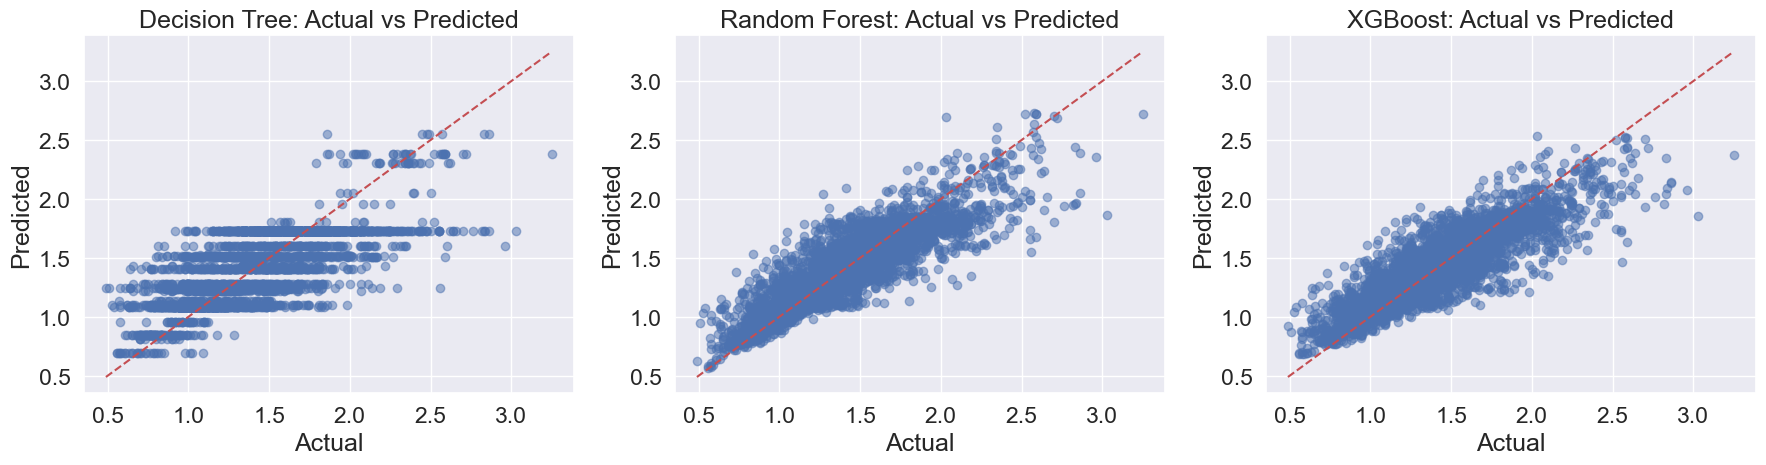

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Decision Tree
axes[0].scatter(y_test, y_pred_dt, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
axes[0].set_title("Decision Tree: Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].grid(True)

# Plot for Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
axes[1].set_title("Random Forest: Actual vs Predicted")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].grid(True)

# Plot for XGBoost
axes[2].scatter(y_test, y_pred_xgb, alpha=0.5)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
axes[2].set_title("XGBoost: Actual vs Predicted")
axes[2].set_xlabel("Actual")
axes[2].set_ylabel("Predicted")
axes[2].grid(True)

plt.tight_layout()
plt.show()


- **Decision Tree**: Shows banding due to constant-value splits. Predictions are more dispersed.
- **Random Forest**: Tight clustering around the ideal line, suggesting reliable generalization.
- **XGBoost**: Strong alignment with the diagonal line, confirming its top performance from the metrics.

These plots, along with evaluation metrics, confirm that Random Forest achieved the best overall performance, while XGBoost also performed well and generalized closely behind.